In [40]:
import nltk
from bs4 import BeautifulSoup
import requests
import wikipedia

In [2]:
def getText(url):
    soup = BeautifulSoup(requests.get(url).text, 'lxml')
    for unwanted in soup(['script', 'style']):
        unwanted.decompose()
    return soup.get_text()

In [41]:
obama_page = wikipedia.page("Barack Obama")

In [42]:
obama_page.content

u'Barack Hussein Obama II (US /b\u0259\u02c8r\u0251\u02d0k hu\u02d0\u02c8se\u026an o\u028a\u02c8b\u0251\u02d0m\u0259/ b\u0259-RAHK hoo-SAYN oh-BAH-m\u0259; born August 4, 1961) is an American politician who served as the 44th President of the United States from 2009 to 2017. He is the first African American to have served as president, as well as the first born outside the contiguous United States. He previously served in the U.S. Senate representing Illinois from 2005 to 2008, and in the Illinois State Senate from 1997 to 2004.\nObama was born in Honolulu, Hawaii, two years after the territory was admitted to the Union as the 50th state. He grew up mostly in Hawaii, but also spent one year of his childhood in Washington State and four years in Indonesia. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988 Obama enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduation, he bec

In [43]:
tokens = nltk.word_tokenize(obama_page.content)

In [44]:
fd = nltk.FreqDist(tokens)
fd.most_common(20)

[(u',', 814),
 (u'the', 710),
 (u'.', 476),
 (u'of', 399),
 (u'in', 376),
 (u'and', 361),
 (u'to', 337),
 (u'Obama', 300),
 (u'a', 235),
 (u'his', 124),
 (u'for', 121),
 (u'on', 111),
 (u'as', 96),
 (u'was', 93),
 (u'that', 92),
 (u"'s", 91),
 (u"''", 81),
 (u'``', 81),
 (u'from', 79),
 (u'by', 78)]

In [45]:
obama_text = nltk.Text(tokens)

In [46]:
obama_text.collocations()

United States; Barack Obama; White House; health care; bin Laden;
general election; Affordable Care; Supreme Court; Harvard Law; Bill
Clinton; New York; Law School; Patient Protection; Democratic Party;
same-sex marriage; Job Creation; Obama announced; National Convention;
Obama signed; high school


In [47]:
obama_text.concordance('election')

Displaying 22 of 22 matches:
dress , and his landslide November election to the Senate . In 2008 , Obama wa
ber 2 , 2008 , two days before his election to the Presidency . Obama also has
 he returned to Chicago . Obama 's election as the first black president of th
lican Yesse Yehudah in the general election , and was reelected again in 2002 
ogations . During his 2004 general election campaign for the U.S. Senate , pol
ate in November 2004 following his election to the U.S. Senate . ==== 2004 U.S
ey Braun to not participate in the election resulted in wide-open Democratic a
idates . In the March 2004 primary election , Obama won in an unexpected lands
s expected opponent in the general election , Republican primary winner Jack R
yan . In the November 2004 general election , Obama won with 70 % of the vote 
he primary process and the general election , Obama 's campaign set numerous f
wn public financing in the general election since the system was created in 19
he posted on his websit

In [48]:
obama_text.concordance('public')

Displaying 15 of 15 matches:
lic School for two years and Besuki Public School for one and a half years , s
ebruary 1981 , Obama made his first public speech , calling for Occidental to 
 Corporation , then at the New York Public Interest Research Group . In 1985 ,
Foreign Relations , Environment and Public Works and Veterans ' Affairs throug
 2007 , he left the Environment and Public Works committee and took additional
presidential candidate to turn down public financing in the general election s
y BP failed , some in the media and public expressed confusion and criticism o
 insurance plan , also known as the public option , to compete with the corpor
ove by the end of 2009 . After much public debate during the Congressional sum
 , a health care bill featuring the public option was passed in the House . On
enate passed its own bill—without a public option—on a party-line vote of 60–3
ncil . In March 2010 , Obama took a public stance against plans by the governm
dent Raúl Castro , in a

In [49]:
obama_text.similar('election')

debates girls motors outreach cabinet communications


In [50]:
obama_text.common_contexts(['election', 'library'])

No common contexts were found


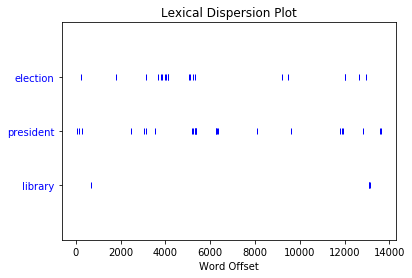

In [51]:
obama_text.dispersion_plot(['election', 'president', 'library'])

In [52]:
def lexical_diversity(text):
    return float(len(set(text))) / len(text)

In [53]:
lexical_diversity(obama_text)

0.2404459715307482

In [55]:
url = 'http://www.economist.com/news/christmas-specials/21712062-barack-obamas-presidency-lurched-between-idealism-and-acrimony-some-his'
page = BeautifulSoup(requests.get(url).text, 'lxml')

In [62]:
content = "".join([i.text for i in page('div', {'class': 'blog-post__text'})])
economist_obama = nltk.Text(nltk.word_tokenize(content))

In [63]:
lexical_diversity(economist_obama)

0.36736334405144694

In [64]:
econ = nltk.FreqDist(economist_obama)

In [65]:
econ.most_common(20)

[(u',', 436),
 (u'the', 278),
 (u'.', 181),
 (u'of', 165),
 (u'in', 151),
 (u'a', 123),
 (u'his', 115),
 (u'to', 110),
 (u'he', 106),
 (u'and', 105),
 (u'that', 67),
 (u'Mr', 61),
 (u'as', 56),
 (u'was', 53),
 (u'is', 44),
 (u'Obama', 37),
 (u'it', 34),
 (u'for', 34),
 (u'at', 33),
 (u'on', 32)]

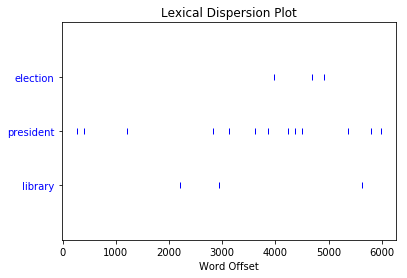

In [66]:
economist_obama.dispersion_plot(['election', 'president', 'library'])

In [67]:
economist_obama.collocations()

White House; South Side; Barack Obama; race relations; Affordable
Care; Care Act; Harvard Law; Law School; skinny kid; education
secretary; health insurance; hard particle; “The Audacity; detail18
hours; terrible war; eight years; inaugural address; second inaugural;
years later; black president


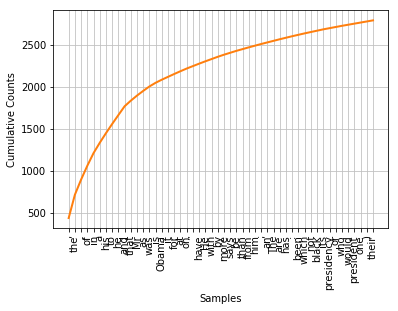

In [69]:
nltk.FreqDist(economist_obama).plot(50, cumulative=True)

In [76]:
len(economist_obama)

6220

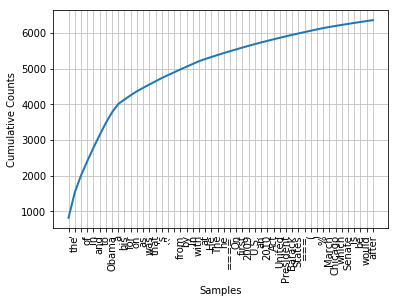

In [77]:
nltk.FreqDist(obama_text).plot(50, cumulative=True)

In [78]:
len(obama_text)

14261

In [80]:
list(nltk.bigrams(economist_obama))[:20]

[(u'1', u'\u201cA'),
 (u'\u201cA', u'skinny'),
 (u'skinny', u'kid'),
 (u'kid', u'with'),
 (u'with', u'a'),
 (u'a', u'funny'),
 (u'funny', u'name\u201dWatch'),
 (u'name\u201dWatch', u'it'),
 (u'it', u'again'),
 (u'again', u'.'),
 (u'.', u'He'),
 (u'He', u'is'),
 (u'is', u'unusually'),
 (u'unusually', u'stilted'),
 (u'stilted', u'at'),
 (u'at', u'the'),
 (u'the', u'beginning'),
 (u'beginning', u','),
 (u',', u'as'),
 (u'as', u'you')]

In [81]:
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [82]:
sense = nltk.corpus.gutenberg.words('austen-sense.txt')

In [83]:
len(sense)

141576

In [84]:
sense_sentences = nltk.corpus.gutenberg.sents('austen-sense.txt')

In [86]:
sense_sentences[0]

[u'[',
 u'Sense',
 u'and',
 u'Sensibility',
 u'by',
 u'Jane',
 u'Austen',
 u'1811',
 u']']

In [87]:
max_len = max(len(s) for s in sense_sentences)

In [88]:
max_len

303

In [89]:
[s for s in sense_sentences if len(s) == max_len]

[[u'I',
  u'am',
  u'sure',
  u'you',
  u'will',
  u'be',
  u'glad',
  u'to',
  u'hear',
  u',',
  u'as',
  u'likewise',
  u'dear',
  u'Mrs',
  u'.',
  u'Jennings',
  u',',
  u'I',
  u'spent',
  u'two',
  u'happy',
  u'hours',
  u'with',
  u'him',
  u'yesterday',
  u'afternoon',
  u',',
  u'he',
  u'would',
  u'not',
  u'hear',
  u'of',
  u'our',
  u'parting',
  u',',
  u'though',
  u'earnestly',
  u'did',
  u'I',
  u',',
  u'as',
  u'I',
  u'thought',
  u'my',
  u'duty',
  u'required',
  u',',
  u'urge',
  u'him',
  u'to',
  u'it',
  u'for',
  u'prudence',
  u'sake',
  u',',
  u'and',
  u'would',
  u'have',
  u'parted',
  u'for',
  u'ever',
  u'on',
  u'the',
  u'spot',
  u',',
  u'would',
  u'he',
  u'consent',
  u'to',
  u'it',
  u';',
  u'but',
  u'he',
  u'said',
  u'it',
  u'should',
  u'never',
  u'be',
  u',',
  u'he',
  u'did',
  u'not',
  u'regard',
  u'his',
  u'mother',
  u"'",
  u's',
  u'anger',
  u',',
  u'while',
  u'he',
  u'could',
  u'have',
  u'my',
  u'affections',

In [91]:
nltk.corpus.brown.categories()

[u'adventure',
 u'belles_lettres',
 u'editorial',
 u'fiction',
 u'government',
 u'hobbies',
 u'humor',
 u'learned',
 u'lore',
 u'mystery',
 u'news',
 u'religion',
 u'reviews',
 u'romance',
 u'science_fiction']

In [93]:
cdf = nltk.ConditionalFreqDist((genre, word) for genre in nltk.corpus.brown.categories()
                              for word in nltk.corpus.brown.words(categories=genre))

In [94]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [95]:
cdf.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [97]:
cdf['romance'].most_common(50)

[(u',', 3899),
 (u'.', 3736),
 (u'the', 2758),
 (u'and', 1776),
 (u'to', 1502),
 (u'a', 1335),
 (u'of', 1186),
 (u'``', 1045),
 (u"''", 1044),
 (u'was', 993),
 (u'I', 951),
 (u'in', 875),
 (u'he', 702),
 (u'had', 692),
 (u'?', 690),
 (u'her', 651),
 (u'that', 583),
 (u'it', 573),
 (u'his', 559),
 (u'she', 496),
 (u'with', 460),
 (u'you', 456),
 (u'for', 410),
 (u'at', 402),
 (u'He', 366),
 (u'on', 362),
 (u'him', 339),
 (u'said', 330),
 (u'!', 316),
 (u'--', 291),
 (u'be', 289),
 (u'as', 282),
 (u';', 264),
 (u'have', 258),
 (u'but', 252),
 (u'not', 250),
 (u'would', 244),
 (u'She', 232),
 (u'The', 230),
 (u'out', 217),
 (u'were', 214),
 (u'up', 211),
 (u'all', 209),
 (u'from', 202),
 (u'could', 193),
 (u'me', 193),
 (u'like', 185),
 (u'been', 179),
 (u'so', 174),
 (u'there', 169)]

In [102]:
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / float(len(text))

In [103]:
content_fraction(sense)

0.5285429733853195

In [104]:
content_fraction(economist_obama)

0.6217041800643087

In [105]:
content_fraction(obama_text)

0.6812285253488535